# **Crowd counting project**
*Matteo Gorni Silvestrini, Arianna Morandi, Beatrice Spagnolo*

This notebook walks through the full pipeline for **training, evaluating, and visualizing** crowd counting models using various state-of-the-art architectures.

It supports models such as `VGG16`, `VGG19`, `Xception`, `ResNet50`, `CSRNet`.

In [ ]:
!git clone https://github.com/matteogorni2/cv_project.git

Cloning into 'cv_project'...
remote: Enumerating objects: 205, done.
remote: Counting objects: 100% (205/205), done.
remote: Compressing objects: 100% (134/134), done.
remote: Total 205 (delta 131), reused 144 (delta 70), pack-reused 0 (from 0)
Receiving objects: 100% (205/205), 72.24 KiB | 591.00 KiB/s, done.
Resolving deltas: 100% (131/131), done.


Make sure to download and upload the mall_dataset.zip file before continuing.

You can download it for free from Kaggle

Link: https://www.kaggle.com/datasets/chaozhuang/mall-dataset

In [ ]:
from google.colab import files

# Prompt the user to upload a file
uploaded = files.upload()

# Display the uploaded file name(s)
for filename in uploaded.keys():
    print(f"✅ Uploaded: {filename}")


Saving mall_dataset.zip to mall_dataset.zip
✅ Uploaded: mall_dataset.zip


In [ ]:
# Extract the uploaded ZIP file into the project directory.
%%capture
!unzip mall_dataset.zip -d cv_project

In [ ]:
# Move to project directory
%cd cv_project

/content/cv_project


## Model Selection

In [1]:
# Choose your model: vgg16, vgg19, xception, resnet or csrnet

# List of supported models
available_models = ['vgg16', 'vgg19', 'xception', 'resnet','csrnet']

# User input
model_name = input(f"Enter model name ({', '.join(available_models)}): ").strip().lower()

# Validate the input
if model_name not in available_models:
    raise ValueError(f"'{model_name}' is not a supported model. Please choose from: {available_models}")

print(f"> Model selected: {model_name}")


Enter model name (vgg16, vgg19, xception, resnet, csrnet): csrnet
> Model selected: csrnet


## Load and Preprocess Data
Create training, validation, and test generators with optional data augmentation.
to enable data augmentation, simply set `augment_data=True` when calling the `get_new_generators` function


In [ ]:
from modules.data_utils.load_and_preprocess_data import get_new_generators
from modules.training_eval_pipeline.training_functions import compile_model,fit_model_using_best_parameters

In [ ]:
train_generator, val_generator, test_generator = get_new_generators(model_name=model_name)

## Visualize Dataset
Plot the distribution of headcounts and show some sample annotated images.

In [ ]:
from modules.data_utils.visualization import *

Total number of images: 2000


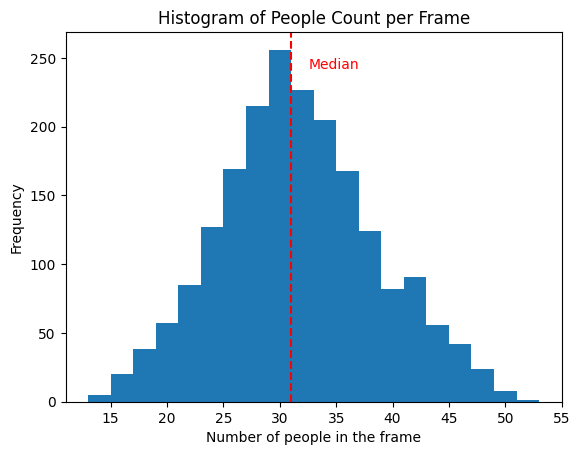

In [ ]:
# Show headcount distribution histogram
plot_headcount_frequency_histogram()

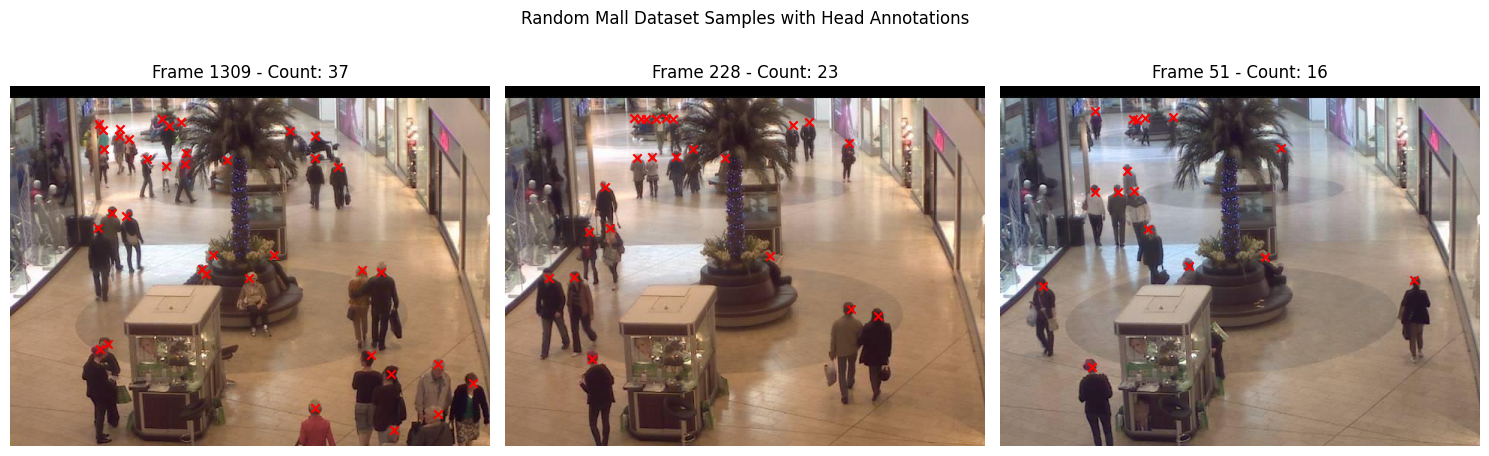

In [ ]:
# Display random image samples with annotations
plot_random_samples_with_annotations()

## Compile the Selected Model
Build and compile the selected architecture using best hyperparameters from the config files.

In [ ]:
new_model=compile_model(model_name=model_name)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


## Train the Model
Train the compiled model using the data generators and optimal settings.

In [ ]:
history,trained_model=fit_model_using_best_parameters(model_name,new_model,train_generator,val_generator)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 406s 8s/step - loss: 0.0051 - mae: 0.0280 - val_loss: 0.0024 - val_mae: 0.0168 - learning_rate: 1.0000e-04
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - loss: 0.0023 - mae: 0.0167 - val_loss: 0.0016 - val_mae: 0.0133 - learning_rate: 1.0000e-04
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - loss: 0.0014 - mae: 0.0131 - val_loss: 0.0012 - val_mae: 0.0123 - learning_rate: 1.0000e-04
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - loss: 0.0012 - mae: 0.0119 - val_loss: 0.0011 - val_mae: 0.0113 - learning_rate: 1.0000e-04
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - loss: 0.0011 - mae: 0.0109 - val_loss: 0.0010 - val_mae: 0.0104 - learning_rate: 1.0000e-04
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - loss: 9.6740e-04 - mae: 0.0104 - val_loss: 0.0011 - val_mae: 0.0109 - learning_rate: 1.0000e-04
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - loss: 8.6403e-04 - mae: 0.0100 - val_loss: 9.7518e-04 - val_mae: 0.0101 - learn

## Visualize Training History
Plot training and validation loss and MAE over epochs.

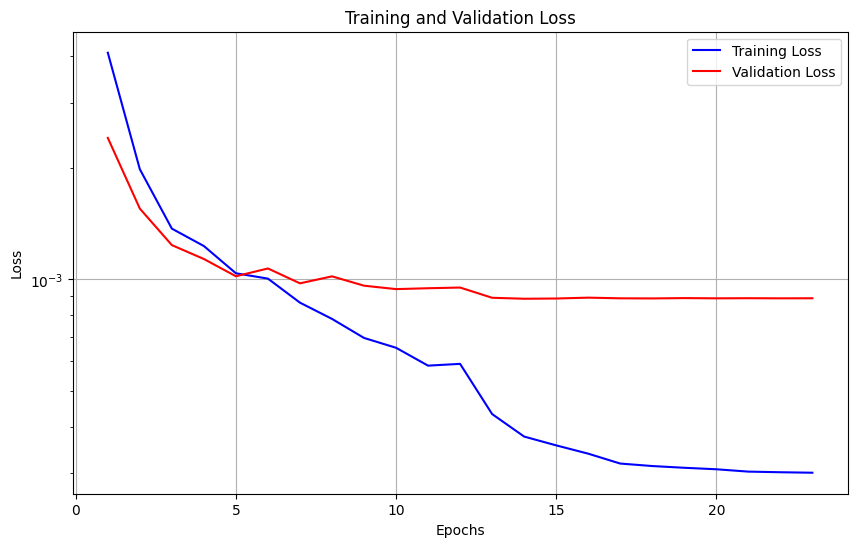

In [ ]:
plot_training_history(history)

## Evaluate Model on Test Set
Run the model on test data and calculate performance metrics.

In [ ]:
from modules.training_eval_pipeline.evaluation_functions import evaluate_model,calculate_metrics,print_metrics

In [ ]:
# Predict on test data
true_counts, pred_counts = evaluate_model(trained_model, test_generator)

In [ ]:
# Compute evaluation metrics
metrics = calculate_metrics(true_counts, pred_counts)

In [ ]:
print_metrics(metrics)

MAE: 1.38
MSE: 3.29
Pearson Correlation: 0.96
RMSE: 1.81


## Visualize Density Maps (CSRNet Only)
Compare predicted and ground truth density maps.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


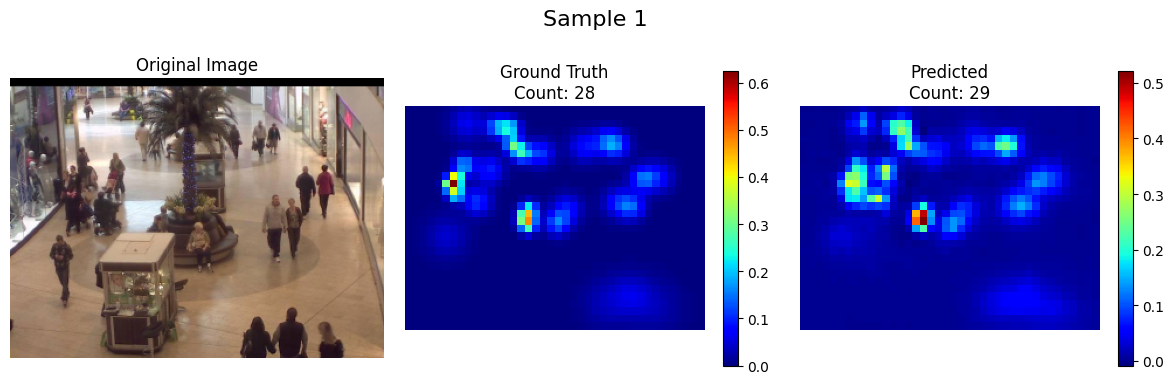

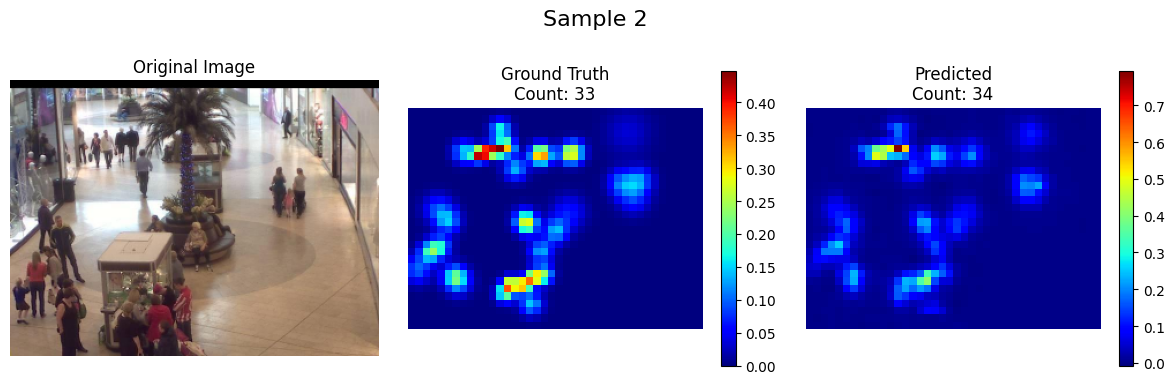

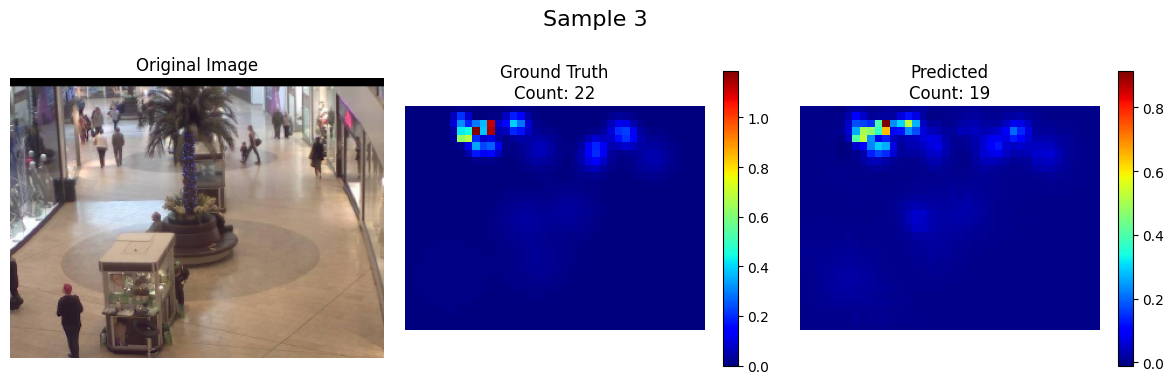

In [ ]:
plot_density_map_comparisons(test_generator,trained_model,random_seed=41)

## End of Workflow
Your model has been trained, evaluated and visualized.

You can now:
* Try a different model
* Change hyperparameters in config/models_parameters.yaml